In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.metrics import mean_squared_error
import math

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from time import time

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

sns.set(rc={'figure.figsize':(8,6)})

zillow_data = pd.read_csv('zillow_data.csv')
zillow_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [2]:
zillow_data.SizeRank

0            1
1            2
2            3
3            4
4            5
         ...  
14718    14719
14719    14720
14720    14721
14721    14722
14722    14723
Name: SizeRank, Length: 14723, dtype: int64

In [3]:
NJ_zillow_data = zillow_data.loc[(zillow_data.State == 'NJ')]
NJ_zillow_data.head(15)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.0,302700.0,303800.0,...,1789100,1803000,1818100,1836900,1850100,1853500,1852200,1854400,1857600,1854300
73,61148,8701,Lakewood,NJ,New York,Ocean,74,153800.0,153400.0,153000.0,...,400500,403900,408400,411000,412600,414000,415700,415600,413400,410700
158,61169,8753,Toms River,NJ,New York,Ocean,159,123400.0,123200.0,122900.0,...,258600,258700,259000,259500,261200,262500,262600,262400,263400,264300
187,60518,7002,Bayonne,NJ,New York,Hudson,188,145000.0,144500.0,143900.0,...,318500,324100,330900,339000,347400,352800,355900,361500,368700,372900
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300
214,60599,7093,West New York,NJ,New York,Hudson,215,131700.0,131900.0,132100.0,...,361200,368200,376800,386200,392900,395100,395500,399400,407000,412700
278,61200,8831,Monroe,NJ,New York,Middlesex,279,218500.0,217900.0,217100.0,...,434800,435500,433800,432100,432100,433000,434300,436000,436900,436500
319,60594,7087,Union City,NJ,New York,Hudson,320,127300.0,127000.0,126700.0,...,367000,377500,386000,394700,403700,410500,415500,424000,437400,448900
519,60642,7305,Jersey City,NJ,New York,Hudson,520,105200.0,104500.0,103800.0,...,228000,231200,234600,241100,251100,261600,268600,276000,286700,295100
528,61175,8759,Manchester,NJ,New York,Ocean,529,100900.0,100400.0,99700.0,...,147800,148900,150000,150800,152000,153500,154700,156100,158000,159500


In [4]:
print(NJ_zillow_data.SizeRank.describe(), '\n')

count      502.000000
mean      7584.605578
std       3611.112723
min         58.000000
25%       5026.750000
50%       8056.000000
75%      10261.750000
max      14648.000000
Name: SizeRank, dtype: float64 



In [5]:
#Calculate the 20% cutoff value
size_rank_20 = NJ_zillow_data.SizeRank.quantile(q=0.2)

print(f'Size Rank 20% cutoff value: {size_rank_20}')

NJ_zillow_data_sr = NJ_zillow_data[NJ_zillow_data['SizeRank']<size_rank_20].drop(['RegionID','State','Metro',
                                                                                  'CountyName','SizeRank'],axis=1)
print(f'Amount of zipcodes: {len(NJ_zillow_data_sr)}')

Size Rank 20% cutoff value: 4107.6
Amount of zipcodes: 101


In [6]:
NJ_zillow_data_sr

,RegionName,City,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
57,7030,Hoboken,301600.0,302700.0,303800.0,304800.0,305800.0,306800.0,308100.0,309400.0,...,1789100,1803000,1818100,1836900,1850100,1853500,1852200,1854400,1857600,1854300
73,8701,Lakewood,153800.0,153400.0,153000.0,152500.0,152200.0,151900.0,151700.0,151700.0,...,400500,403900,408400,411000,412600,414000,415700,415600,413400,410700
158,8753,Toms River,123400.0,123200.0,122900.0,122500.0,122200.0,121900.0,121600.0,121400.0,...,258600,258700,259000,259500,261200,262500,262600,262400,263400,264300
187,7002,Bayonne,145000.0,144500.0,143900.0,143300.0,142800.0,142400.0,142100.0,142000.0,...,318500,324100,330900,339000,347400,352800,355900,361500,368700,372900
191,7302,Jersey City,137200.0,137800.0,138500.0,139100.0,139600.0,140100.0,140700.0,141400.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,7090,Westfield,272700.0,272200.0,271700.0,271100.0,270400.0,269700.0,268900.0,268100.0,...,724000,729900,737800,748600,754300,754200,754700,757200,756400,752200
4042,7039,Livingston,239500.0,238900.0,238000.0,236800.0,235400.0,234000.0,232700.0,231600.0,...,600000,606200,608700,608200,606800,603900,602600,603300,602700,599500
4044,7501,Paterson,105400.0,105500.0,105600.0,105700.0,105800.0,106000.0,106300.0,106600.0,...,150400,151600,152900,154400,158000,164000,169800,175200,182000,187200
4072,7920,Bernards,354600.0,354900.0,355100.0,355200.0,355200.0,355300.0,355500.0,355700.0,...,759400,755100,753000,751900,749900,747800,745300,743900,744700,746000


In [7]:
NJ_zillow_data_sr['yr_avg']=NJ_zillow_data_sr.iloc[:,-12:].mean(skipna=True, axis=1)
print(NJ_zillow_data_sr['yr_avg'].describe(),'\n')

q_60 = NJ_zillow_data_sr['yr_avg'].quantile(q=0.60)
print(f'Average Value 60% cutoff value: {round(q_60,2)}')

q_35 = NJ_zillow_data_sr['yr_avg'].quantile(q=0.35)
print(f'Average Value 35% cutoff value: {round(q_35,2)}')

ZC_pref = NJ_zillow_data_sr[(NJ_zillow_data_sr['yr_avg']<q_60) & (NJ_zillow_data_sr['yr_avg']>q_35)]
print(f'Amount of zipcodes: {len(ZC_pref)}')

count    1.010000e+02
mean     3.489724e+05
std      2.318088e+05
min      6.806667e+04
25%      2.274500e+05
50%      3.157917e+05
75%      4.001417e+05
max      1.821550e+06
Name: yr_avg, dtype: float64 

Average Value 60% cutoff value: 335283.33
Average Value 35% cutoff value: 261525.0
Amount of zipcodes: 24


In [8]:
#Calculate historical return on investments
ZC_pref['ROI']= (ZC_pref['2018-04']/ZC_pref['1996-04'])-1
#Calculate standard deviation of monthly values
ZC_pref['std']= ZC_pref.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)
ZC_pref['mean']= ZC_pref.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)

ZC_pref['CV']= ZC_pref['std']/ZC_pref['mean']

ZC_pref[['RegionName','std','mean','ROI','CV']]

print(ZC_pref.CV.describe())

upper_cv = ZC_pref.CV.quantile(.6)

print(f'\nCV upper limit: {upper_cv}')

zc_best5 = ZC_pref[ZC_pref['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:5]
print('\n Best 5 Zipcodes:')
zc_best5[['RegionName','ROI','CV']]



count    24.000000
mean      0.272902
std       0.033210
min       0.228629
25%       0.243638
50%       0.278855
75%       0.289512
max       0.343276
Name: CV, dtype: float64

CV upper limit: 0.282880395202585

 Best 5 Zipcodes:


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,RegionName,ROI,CV
641,7003,1.333807,0.282455
1168,8724,1.310789,0.281397
1411,8817,1.243534,0.265855
832,7601,1.188571,0.276313
861,7083,1.087270,0.257657


In [9]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [265]:
zc_best5

,RegionName,City,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-12,2018-01,2018-02,2018-03,2018-04,yr_avg,ROI,std,mean,CV
641,7003,Bloomfield,140800.0,141000.0,141100.0,141000.0,140800.0,140400.0,139900.0,139300.0,...,323600,326600,329100,329700,328600,317491.666667,1.333807,74825.221159,264910.188679,0.282455
1168,8724,Brick,124200.0,123800.0,123400.0,123000.0,122700.0,122400.0,122200.0,122200.0,...,283400,284900,285600,286300,287000,279908.333333,1.310789,66286.909450,235563.773585,0.281397
1411,8817,Edison,139200.0,138800.0,138400.0,138100.0,137700.0,137500.0,137300.0,137200.0,...,303600,306100,308900,311500,312300,300966.666667,1.243534,66684.862385,250831.320755,0.265855
832,7601,Hackensack,157500.0,157500.0,157500.0,157500.0,157400.0,157400.0,157400.0,157400.0,...,332900,337500,341400,343700,344700,331400.000000,1.188571,79079.311969,286194.339623,0.276313
861,7083,Union,152400.0,152200.0,151900.0,151800.0,151800.0,151900.0,152200.0,152500.0,...,311600,314600,316900,317800,318100,304341.666667,1.087270,67693.605874,262727.547170,0.257657


In [10]:
zc_best5.iloc[:, 1:-5]

,City,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
641,Bloomfield,140800.0,141000.0,141100.0,141000.0,140800.0,140400.0,139900.0,139300.0,138800.0,...,307500,310200,313000,316600,320700,323600,326600,329100,329700,328600
1168,Brick,124200.0,123800.0,123400.0,123000.0,122700.0,122400.0,122200.0,122200.0,122400.0,...,274000,275600,277000,278500,281100,283400,284900,285600,286300,287000
1411,Edison,139200.0,138800.0,138400.0,138100.0,137700.0,137500.0,137300.0,137200.0,137300.0,...,293900,297000,298800,299900,301500,303600,306100,308900,311500,312300
832,Hackensack,157500.0,157500.0,157500.0,157500.0,157400.0,157400.0,157400.0,157400.0,157500.0,...,323700,326000,326800,327600,329600,332900,337500,341400,343700,344700
861,Union,152400.0,152200.0,151900.0,151800.0,151800.0,151900.0,152200.0,152500.0,152900.0,...,290300,294800,301500,307300,309600,311600,314600,316900,317800,318100


In [11]:
df_time =get_datetimes(zc_best5.iloc[:, 1:-5])

In [264]:
df_time

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [12]:
def melt_data(df):
    #id_vars keeps all columns you want to remain intake, var_name 
    melted = pd.melt(df, id_vars=['RegionName','City'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [13]:
# Now that we identified the individual zip codes in NJ that might be a good place to invest, we will put into df
ZC_best5= zc_best5.drop(['yr_avg', 'std', 'mean', 'ROI', 'CV'], axis=1)
ZC_best5

,RegionName,City,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
641,7003,Bloomfield,140800.0,141000.0,141100.0,141000.0,140800.0,140400.0,139900.0,139300.0,...,307500,310200,313000,316600,320700,323600,326600,329100,329700,328600
1168,8724,Brick,124200.0,123800.0,123400.0,123000.0,122700.0,122400.0,122200.0,122200.0,...,274000,275600,277000,278500,281100,283400,284900,285600,286300,287000
1411,8817,Edison,139200.0,138800.0,138400.0,138100.0,137700.0,137500.0,137300.0,137200.0,...,293900,297000,298800,299900,301500,303600,306100,308900,311500,312300
832,7601,Hackensack,157500.0,157500.0,157500.0,157500.0,157400.0,157400.0,157400.0,157400.0,...,323700,326000,326800,327600,329600,332900,337500,341400,343700,344700
861,7083,Union,152400.0,152200.0,151900.0,151800.0,151800.0,151900.0,152200.0,152500.0,...,290300,294800,301500,307300,309600,311600,314600,316900,317800,318100


In [14]:
ZC_best5.RegionName.unique()

array([7003, 8724, 8817, 7601, 7083], dtype=int64)

In [15]:
ZC_best5 = melt_data(ZC_best5).set_index('time')

In [16]:
ZC_best5[ZC_best5.RegionName == 7003].asfreq('MS')

,RegionName,City,value
time,,,
1996-04-01,7003,Bloomfield,140800.0
1996-05-01,7003,Bloomfield,141000.0
1996-06-01,7003,Bloomfield,141100.0
1996-07-01,7003,Bloomfield,141000.0
1996-08-01,7003,Bloomfield,140800.0
...,...,...,...
2017-12-01,7003,Bloomfield,323600.0
2018-01-01,7003,Bloomfield,326600.0
2018-02-01,7003,Bloomfield,329100.0


In [17]:
df_ZC_best5 = []
for zc in ZC_best5.RegionName.unique():
    #Create seperate df for each zipcodes with a monthly fq
    df = ZC_best5[ZC_best5.RegionName == zc].asfreq('MS')
    df_ZC_best5.append(df)

In [18]:
df_ZC_best5[0]

,RegionName,City,value
time,,,
1996-04-01,7003,Bloomfield,140800.0
1996-05-01,7003,Bloomfield,141000.0
1996-06-01,7003,Bloomfield,141100.0
1996-07-01,7003,Bloomfield,141000.0
1996-08-01,7003,Bloomfield,140800.0
...,...,...,...
2017-12-01,7003,Bloomfield,323600.0
2018-01-01,7003,Bloomfield,326600.0
2018-02-01,7003,Bloomfield,329100.0


In [19]:
df_ZC_best5[0]['City'].unique()[0]

'Bloomfield'

In [20]:
list_RegionName = []
list_zipcode=[7003, 8724, 8817, 7601, 7083]
for i in range(len(list_zipcode)):
    RegionName = NJ_zillow_data.loc[NJ_zillow_data.RegionName == list_zipcode[i]].City
    list_RegionName.append(RegionName.reset_index(drop=True)[0])

In [21]:
len(df_ZC_best5)

5

In [253]:
df_ZC_best5[0].iloc[(df_ZC_best5[0].index == datetime(2017,1,1))].index

DatetimeIndex(['2017-01-01'], dtype='datetime64[ns]', name='time', freq='MS')

In [260]:
maxid = df_ZC_best5[0]['value'].loc['2004':'2010'].idxmax()
crash = '01-2009'

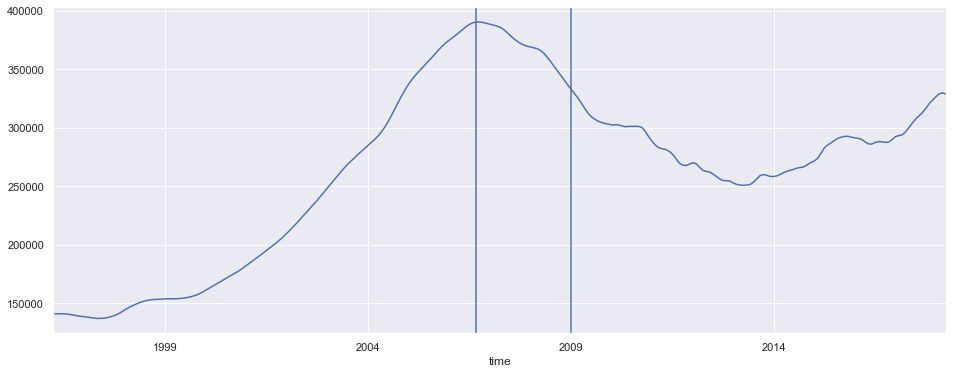

In [263]:
df_ZC_best5[0]['value'].plot(label= df_ZC_best5[0]['City'][0], figsize = (16,6))

plt.axvline(maxid, label='Max Price')
plt.axvline(crash, label='Crash Price')

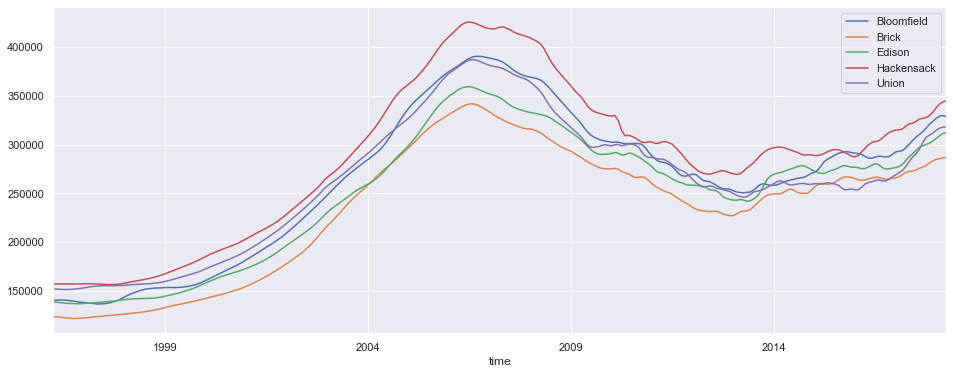

In [266]:
for i in range(len(df_ZC_best5)):
    df_ZC_best5[i]['value'].plot(label= df_ZC_best5[i]['City'][0], figsize = (16,6))
    plt.legend()

In [23]:
zc_best5

,RegionName,City,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-12,2018-01,2018-02,2018-03,2018-04,yr_avg,ROI,std,mean,CV
641,7003,Bloomfield,140800.0,141000.0,141100.0,141000.0,140800.0,140400.0,139900.0,139300.0,...,323600,326600,329100,329700,328600,317491.666667,1.333807,74825.221159,264910.188679,0.282455
1168,8724,Brick,124200.0,123800.0,123400.0,123000.0,122700.0,122400.0,122200.0,122200.0,...,283400,284900,285600,286300,287000,279908.333333,1.310789,66286.909450,235563.773585,0.281397
1411,8817,Edison,139200.0,138800.0,138400.0,138100.0,137700.0,137500.0,137300.0,137200.0,...,303600,306100,308900,311500,312300,300966.666667,1.243534,66684.862385,250831.320755,0.265855
832,7601,Hackensack,157500.0,157500.0,157500.0,157500.0,157400.0,157400.0,157400.0,157400.0,...,332900,337500,341400,343700,344700,331400.000000,1.188571,79079.311969,286194.339623,0.276313
861,7083,Union,152400.0,152200.0,151900.0,151800.0,151800.0,151900.0,152200.0,152500.0,...,311600,314600,316900,317800,318100,304341.666667,1.087270,67693.605874,262727.547170,0.257657


In [24]:
# Need to find the monthly returns in a new column mreturns 
for i in range(len(df_ZC_best5)):
    df_ZC_best5[i]['mreturns']=np.nan*len(df_ZC_best5[i])

In [25]:
df_ZC_best5[1]

,RegionName,City,value,mreturns
time,,,,
1996-04-01,8724,Brick,124200.0,NaN
1996-05-01,8724,Brick,123800.0,NaN
1996-06-01,8724,Brick,123400.0,NaN
1996-07-01,8724,Brick,123000.0,NaN
1996-08-01,8724,Brick,122700.0,NaN
...,...,...,...,...
2017-12-01,8724,Brick,283400.0,NaN
2018-01-01,8724,Brick,284900.0,NaN
2018-02-01,8724,Brick,285600.0,NaN


In [27]:
range(len(df_ZC_best5[i])-1)

range(0, 264)

In [54]:
for i in range(len(df_ZC_best5)):
    for j in range(len(df_ZC_best5[i])-1):
        if j != 0:
            df_ZC_best5[i]['mreturns'][j+1]= ((df_ZC_best5[i].value.iloc[j+1]/ df_ZC_best5[i].value.iloc[j])-1)*10
        elif j == 0:
            df_ZC_best5[i]['mreturns'][j] = 0

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [55]:
df_ZC_best5[0]

,RegionName,City,value,mreturns
time,,,,
1996-04-01,7003,Bloomfield,140800.0,0.000000
1996-05-01,7003,Bloomfield,141000.0,0.014205
1996-06-01,7003,Bloomfield,141100.0,0.007092
1996-07-01,7003,Bloomfield,141000.0,-0.007087
1996-08-01,7003,Bloomfield,140800.0,-0.014184
...,...,...,...,...
2017-12-01,7003,Bloomfield,323600.0,0.090427
2018-01-01,7003,Bloomfield,326600.0,0.092707
2018-02-01,7003,Bloomfield,329100.0,0.076546


Text(0, 0.5, 'Month to Month ROI %')

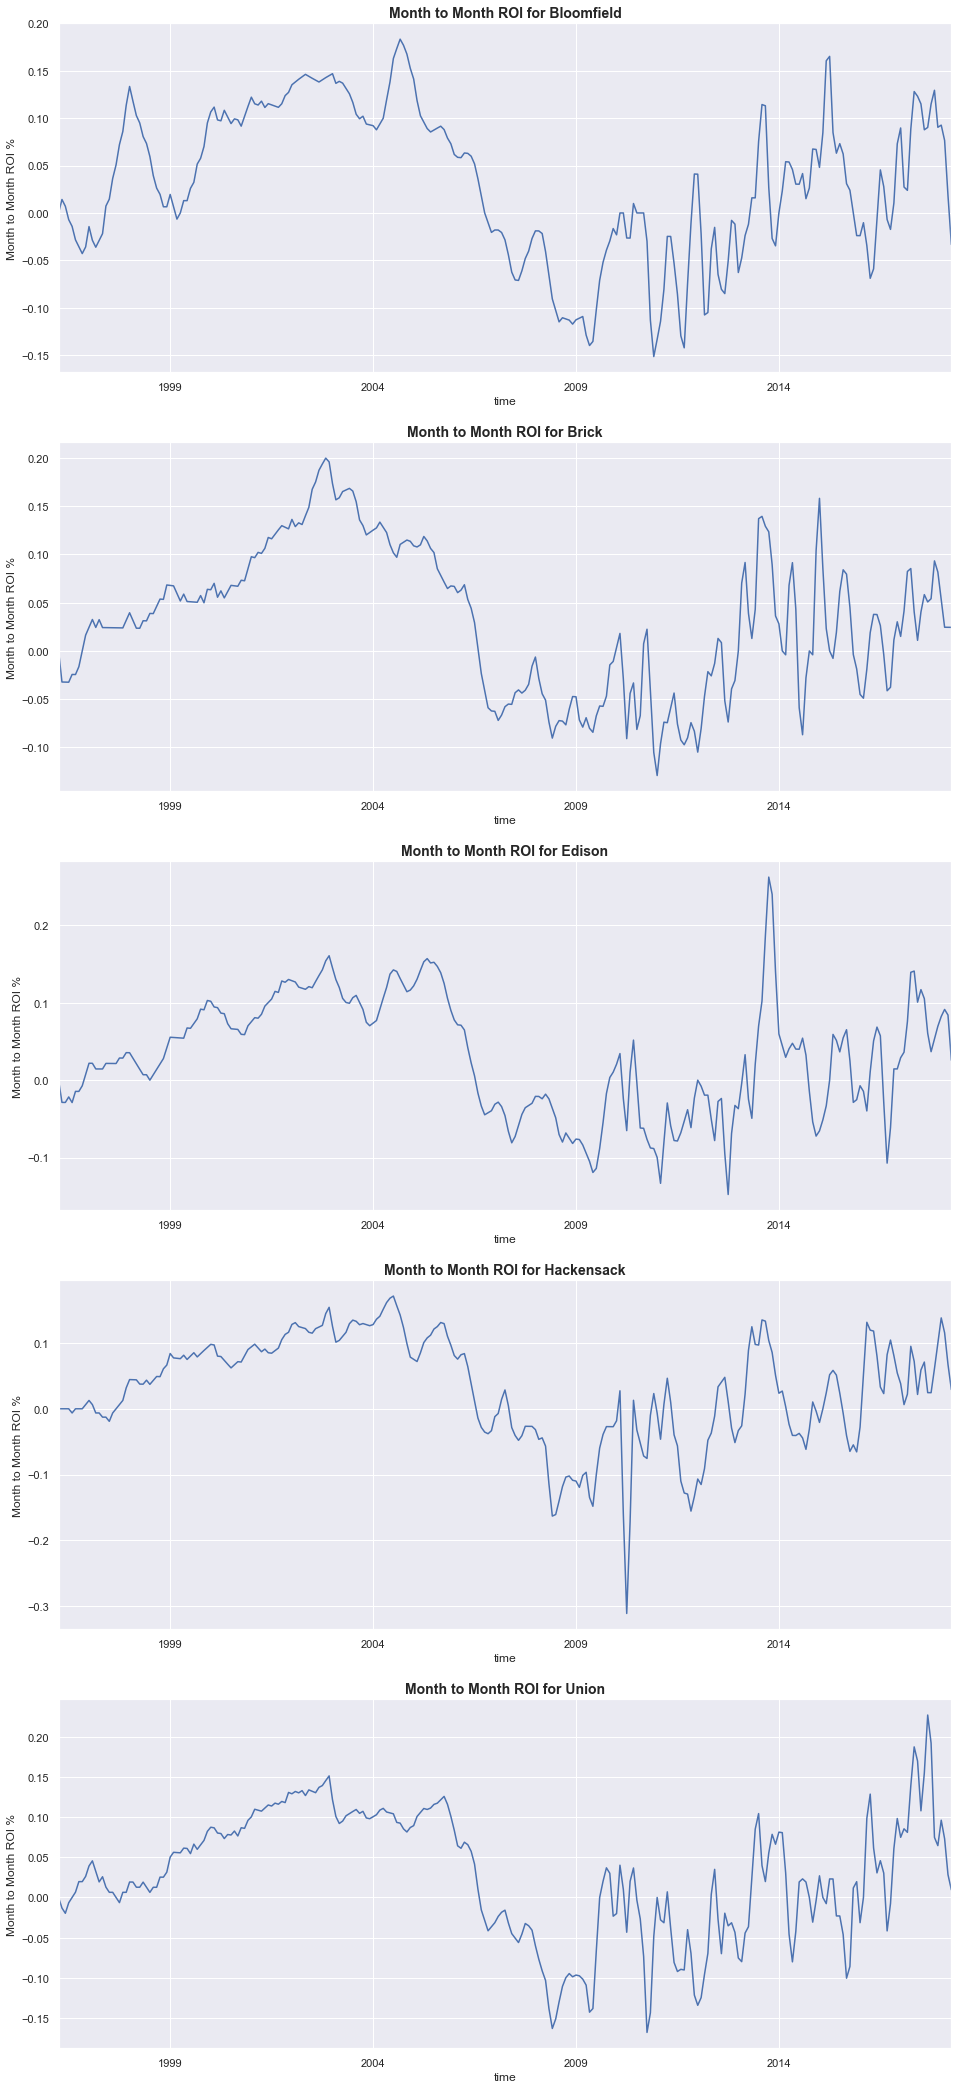

In [56]:
plt.subplots_adjust(top=2, wspace=.5, hspace=0.2)
plt.subplot(5,1,1)
df_ZC_best5[0]['mreturns'].plot(figsize = (16,15))
plt.title(f'Month to Month ROI for {df_ZC_best5[0].City[0]}', fontweight ="bold", fontsize = 14)
plt.ylabel('Month to Month ROI %')

plt.subplot(5,1,2)
df_ZC_best5[1]['mreturns'].plot(figsize = (16,15))
plt.title(f'Month to Month ROI for {df_ZC_best5[1].City[0]}', fontweight ="bold", fontsize = 14)
plt.ylabel('Month to Month ROI %')

plt.subplot(5,1,3)
df_ZC_best5[2]['mreturns'].plot(figsize = (16,15))
plt.title(f'Month to Month ROI for {df_ZC_best5[2].City[0]}', fontweight ="bold", fontsize = 14)
plt.ylabel('Month to Month ROI %')

plt.subplot(5,1,4)
df_ZC_best5[3]['mreturns'].plot(figsize = (16,15))
plt.title(f'Month to Month ROI for {df_ZC_best5[3].City[0]}', fontweight ="bold", fontsize = 14)
plt.ylabel('Month to Month ROI %')

plt.subplot(5,1,5)
df_ZC_best5[4]['mreturns'].plot(figsize = (16,15))
plt.title(f'Month to Month ROI for {df_ZC_best5[4].City[0]}', fontweight ="bold", fontsize = 14)
plt.ylabel('Month to Month ROI %')


In [66]:
def stationarity_check(df,df_name):
    # Create rolling mean and std to test for trends
    roll_mean = df.rolling(window=8, center=False).mean()
    roll_std = df.rolling(window=8, center=False).std()
    
    # The Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(df)
    # Plot rolling statistics
    fig = plt.figure(figsize=(12,7))
    plt.plot(df, color = 'blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation ' + df_name)
    plt.show(block=False)
    
    #Print Dickey_fuller test results
    print('Results of the Dickey-Fuller Test: \n')

    #Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observation'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return None

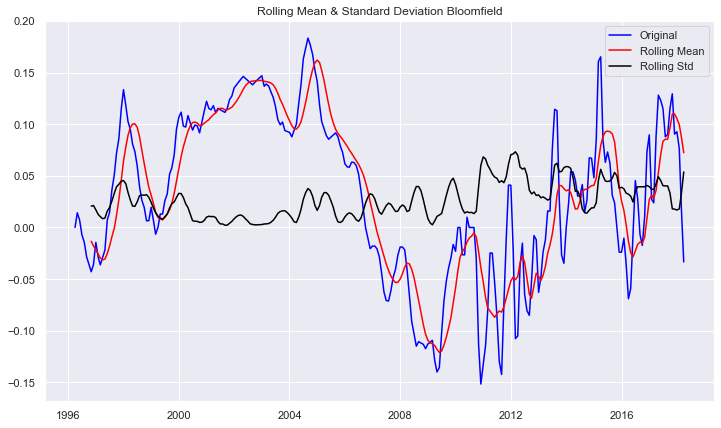

Results of the Dickey-Fuller Test: 

Test Statistic            -1.284758
p-value                    0.636117
#lags Used                16.000000
Number of Observation    248.000000
Critical Value (1%)       -3.456996
Critical Value (5%)       -2.873266
Critical Value (10%)      -2.573019
dtype: float64


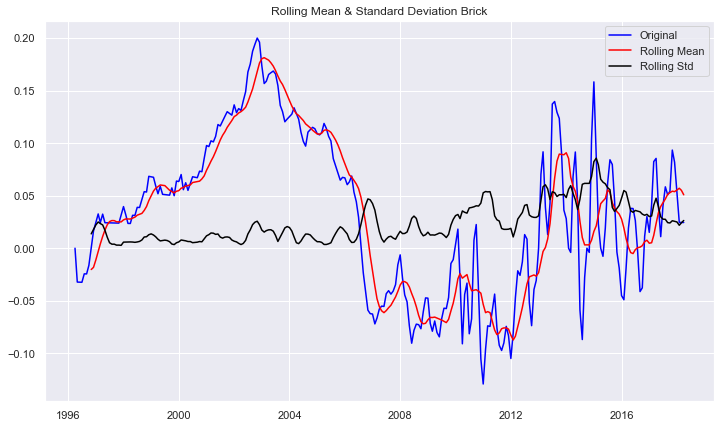

Results of the Dickey-Fuller Test: 

Test Statistic            -1.624812
p-value                    0.470208
#lags Used                13.000000
Number of Observation    251.000000
Critical Value (1%)       -3.456674
Critical Value (5%)       -2.873125
Critical Value (10%)      -2.572944
dtype: float64


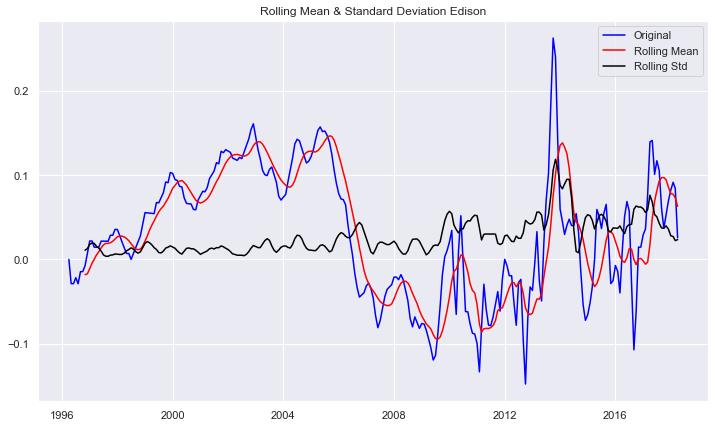

Results of the Dickey-Fuller Test: 

Test Statistic            -1.620273
p-value                    0.472586
#lags Used                16.000000
Number of Observation    248.000000
Critical Value (1%)       -3.456996
Critical Value (5%)       -2.873266
Critical Value (10%)      -2.573019
dtype: float64


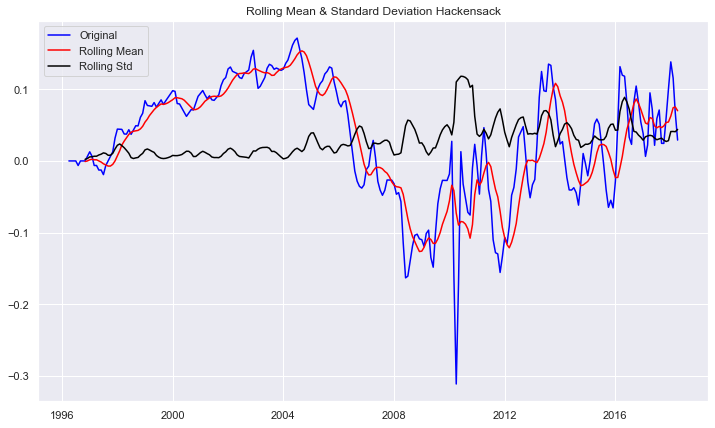

Results of the Dickey-Fuller Test: 

Test Statistic            -1.619781
p-value                    0.472844
#lags Used                15.000000
Number of Observation    249.000000
Critical Value (1%)       -3.456888
Critical Value (5%)       -2.873219
Critical Value (10%)      -2.572994
dtype: float64


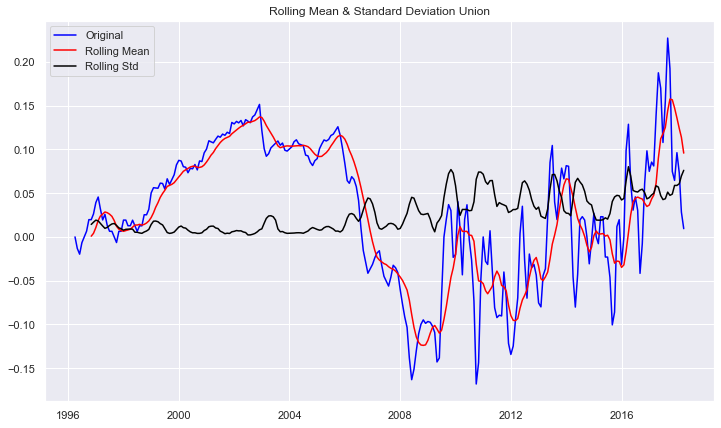

Results of the Dickey-Fuller Test: 

Test Statistic            -1.609430
p-value                    0.478855
#lags Used                14.000000
Number of Observation    250.000000
Critical Value (1%)       -3.456781
Critical Value (5%)       -2.873172
Critical Value (10%)      -2.572969
dtype: float64


In [67]:
for i in range(len(df_ZC_best5)):
    stationarity_check(df_ZC_best5[i]['mreturns'], df_ZC_best5[i].City[0])

In [68]:
df_ZC_best5_diff = []
for i in range(len(df_ZC_best5)):
    #Perform one differencing in all 5 zipcodes
    df_diff = df_ZC_best5[i]['mreturns'].diff()
    df_diff.isna().sum()
    df_diff.dropna(inplace=True)
    df_ZC_best5_diff.append(df_diff)

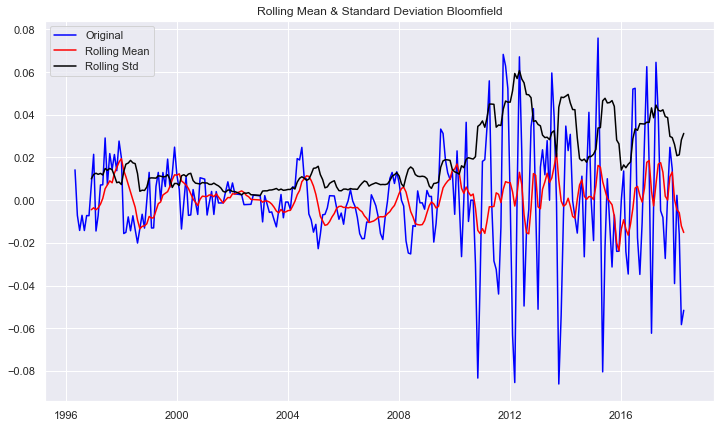

Results of the Dickey-Fuller Test: 

Test Statistic          -6.710500e+00
p-value                  3.691144e-09
#lags Used               1.600000e+01
Number of Observation    2.470000e+02
Critical Value (1%)     -3.457105e+00
Critical Value (5%)     -2.873314e+00
Critical Value (10%)    -2.573044e+00
dtype: float64


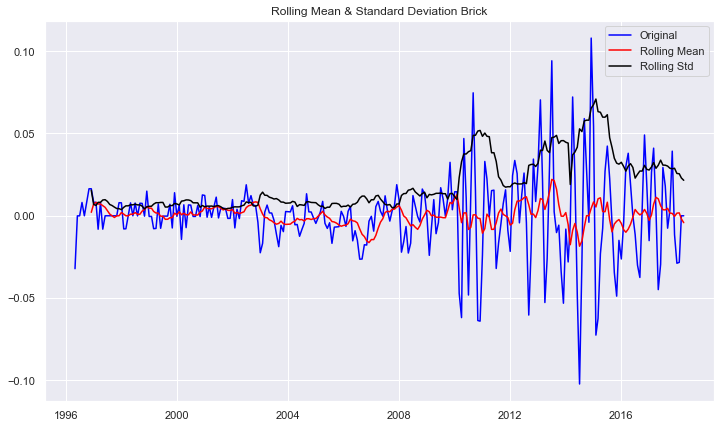

Results of the Dickey-Fuller Test: 

Test Statistic            -4.963993
p-value                    0.000026
#lags Used                12.000000
Number of Observation    251.000000
Critical Value (1%)       -3.456674
Critical Value (5%)       -2.873125
Critical Value (10%)      -2.572944
dtype: float64


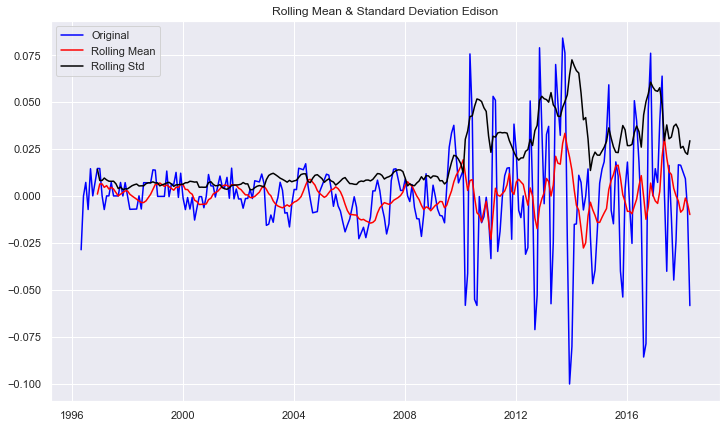

Results of the Dickey-Fuller Test: 

Test Statistic          -6.921814e+00
p-value                  1.141366e-09
#lags Used               1.600000e+01
Number of Observation    2.470000e+02
Critical Value (1%)     -3.457105e+00
Critical Value (5%)     -2.873314e+00
Critical Value (10%)    -2.573044e+00
dtype: float64


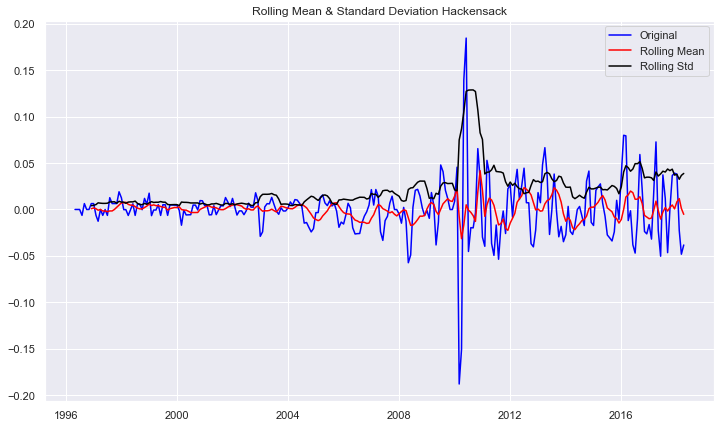

Results of the Dickey-Fuller Test: 

Test Statistic            -5.139629
p-value                    0.000012
#lags Used                14.000000
Number of Observation    249.000000
Critical Value (1%)       -3.456888
Critical Value (5%)       -2.873219
Critical Value (10%)      -2.572994
dtype: float64


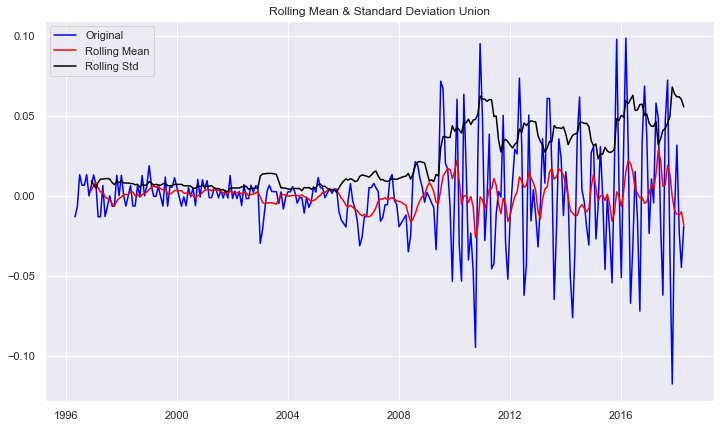

Results of the Dickey-Fuller Test: 

Test Statistic            -5.247251
p-value                    0.000007
#lags Used                13.000000
Number of Observation    250.000000
Critical Value (1%)       -3.456781
Critical Value (5%)       -2.873172
Critical Value (10%)      -2.572969
dtype: float64


In [73]:
for i in range(len(df_ZC_best5_diff)):
    stationarity_check(df_ZC_best5_diff[i],  df_ZC_best5[i].City[0])

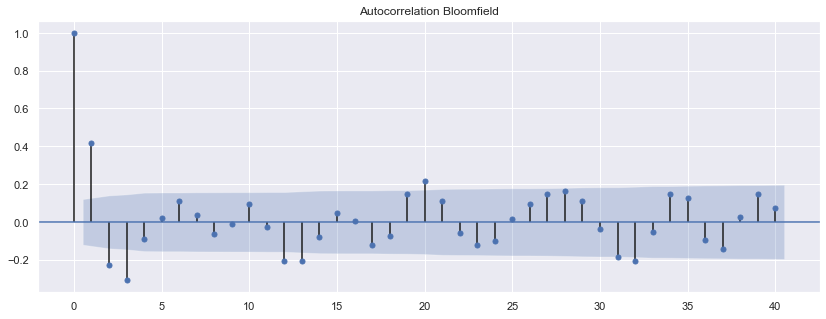

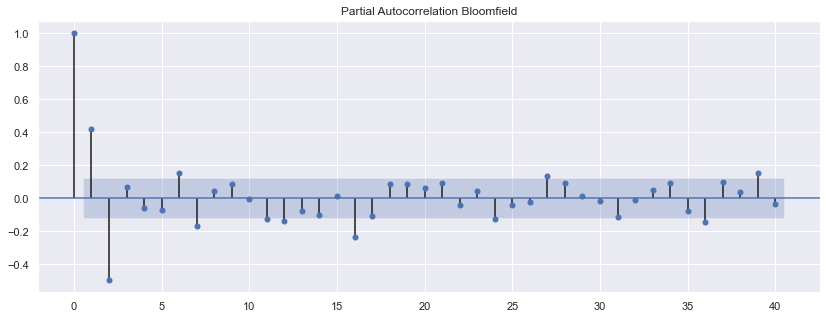

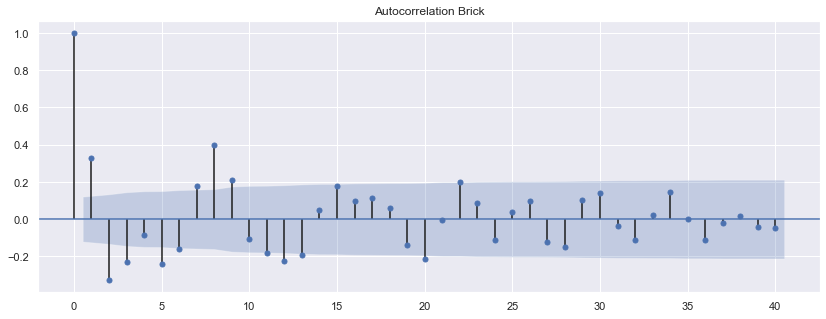

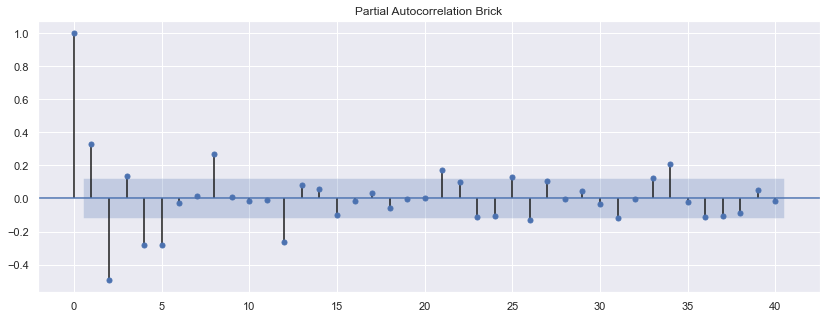

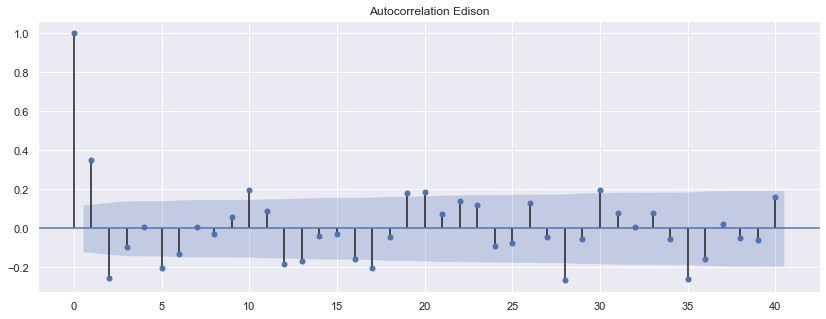

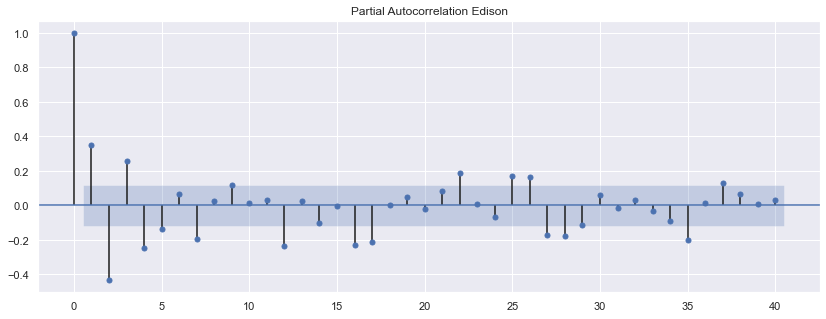

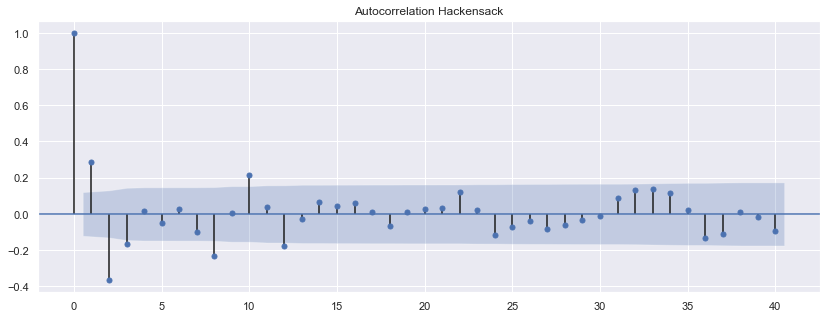

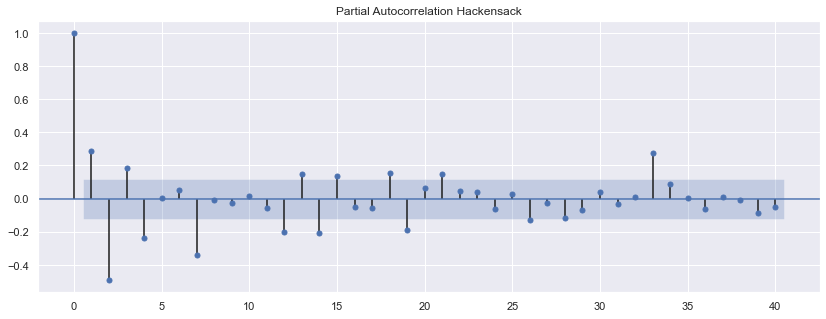

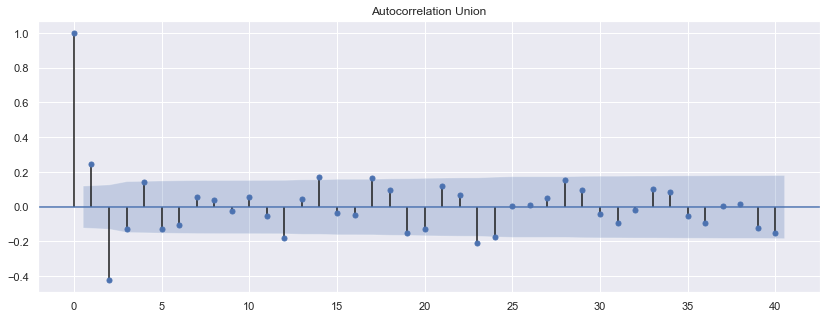

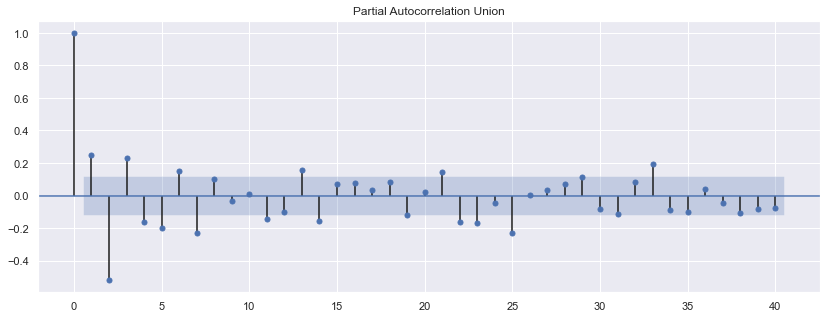

In [77]:
rcParams['figure.figsize'] = 14,5
for i in range(len(df_ZC_best5_diff)):
    plot_acf(df_ZC_best5_diff[i], title='Autocorrelation '+ df_ZC_best5[i].City[0], lags=40);
    plot_pacf(df_ZC_best5_diff[i], title='Partial Autocorrelation '+ df_ZC_best5[i].City[0], lags=40);

In [ ]:
decomposition = seasonal_decompose(data_diff_p12)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(wny_zd, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [238]:
def train_test(df):
    pred_start = datetime(2017,1,1)
    pred_end = datetime(2018,1,1)

    # Setting the train data to extend to 12-1-2014
    train = df[:pred_start]
    # Setting the test data to extend to 12-1-2017
    test = df[pred_start + timedelta(days=1):pred_end]
    return train, test

In [239]:
def model_fit_ARIMA(df,pdq=(1,0,1)):
    train, test = train_test(df)
    model_arima = ARIMA(train,order=pdq)
    results = model_arima.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    return train, test, results

In [240]:
pdq = (0,1,0)
train, test, results = model_fit_ARIMA(df_ZC_best5[0]['mreturns'], pdq=pdq)

                             ARIMA Model Results                              
Dep. Variable:             D.mreturns   No. Observations:                  249
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 585.044
Method:                           css   S.D. of innovations              0.023
Date:                Tue, 30 Mar 2021   AIC                          -1166.088
Time:                        23:20:18   BIC                          -1159.053
Sample:                    05-01-1996   HQIC                         -1163.256
                         - 01-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.246      0.805      -0.003       0.003


In [237]:
train_pred

2014-01-01   -3.472222e-02
2014-02-01    1.084202e-19
2014-03-01    2.168404e-19
2014-04-01    3.252607e-19
2014-05-01    4.336809e-19
2014-06-01    5.421011e-19
2014-07-01    6.505213e-19
2014-08-01    7.589415e-19
2014-09-01    8.673617e-19
2014-10-01    9.757820e-19
2014-11-01    1.084202e-18
2014-12-01    1.192622e-18
2015-01-01    1.301043e-18
2015-02-01    1.409463e-18
2015-03-01    1.517883e-18
2015-04-01    1.626303e-18
2015-05-01    1.734723e-18
2015-06-01    1.843144e-18
2015-07-01    1.951564e-18
2015-08-01    2.059984e-18
2015-09-01    2.168404e-18
2015-10-01    2.276825e-18
2015-11-01    2.385245e-18
2015-12-01    2.493665e-18
2016-01-01    2.602085e-18
2016-02-01    2.710505e-18
2016-03-01    2.818926e-18
2016-04-01    2.927346e-18
2016-05-01    3.035766e-18
2016-06-01    3.144186e-18
2016-07-01    3.252607e-18
2016-08-01    3.361027e-18
2016-09-01    3.469447e-18
2016-10-01    3.577867e-18
2016-11-01    3.686287e-18
2016-12-01    3.794708e-18
2017-01-01    3.903128e-18
2

ARIMA model RMSE on train data: 0.03141


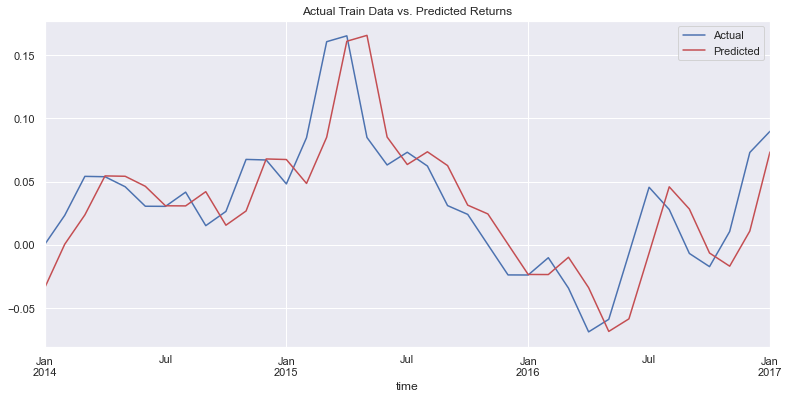

In [241]:
pred_start = datetime(2014,1,1)
pred_end = datetime(2017,1,1)

train_pred = results.predict(start = pred_start, end = pred_end, typ='levels')
rmse = math.sqrt(mean_squared_error(train[pred_start:pred_end],train_pred))
print(f'ARIMA model RMSE on train data: %.5f' % rmse)

plt.figure(figsize=(13,6))
train[pred_start:pred_end].plot(label='Actual',color='b')
train_pred.plot(label='Predicted',color='r')
plt.legend(loc='best')
plt.title('Actual Train Data vs. Predicted Returns')
plt.show()

In [242]:
train

time
1996-04-01    0.000000
1996-05-01    0.014205
1996-06-01    0.007092
1996-07-01   -0.007087
1996-08-01   -0.014184
                ...   
2016-09-01   -0.006942
2016-10-01   -0.017367
2016-11-01    0.010438
2016-12-01    0.072993
2017-01-01    0.089717
Freq: MS, Name: mreturns, Length: 250, dtype: float64

In [231]:
train_pred

2014-01-01   -3.472222e-02
2014-02-01    1.084202e-19
2014-03-01    2.168404e-19
2014-04-01    3.252607e-19
2014-05-01    4.336809e-19
2014-06-01    5.421011e-19
2014-07-01    6.505213e-19
2014-08-01    7.589415e-19
2014-09-01    8.673617e-19
2014-10-01    9.757820e-19
2014-11-01    1.084202e-18
2014-12-01    1.192622e-18
2015-01-01    1.301043e-18
2015-02-01    1.409463e-18
2015-03-01    1.517883e-18
2015-04-01    1.626303e-18
2015-05-01    1.734723e-18
2015-06-01    1.843144e-18
2015-07-01    1.951564e-18
2015-08-01    2.059984e-18
2015-09-01    2.168404e-18
2015-10-01    2.276825e-18
2015-11-01    2.385245e-18
2015-12-01    2.493665e-18
2016-01-01    2.602085e-18
2016-02-01    2.710505e-18
2016-03-01    2.818926e-18
2016-04-01    2.927346e-18
2016-05-01    3.035766e-18
2016-06-01    3.144186e-18
2016-07-01    3.252607e-18
2016-08-01    3.361027e-18
2016-09-01    3.469447e-18
2016-10-01    3.577867e-18
2016-11-01    3.686287e-18
2016-12-01    3.794708e-18
2017-01-01    3.903128e-18
2

In [127]:
import warnings
warnings.filterwarnings('ignore')
import itertools
d=range(0,2)
p=q=range(0,3)
pdq = list(itertools.product(p,d,q))

params=[]
aics=[]

for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        params.append(param)
        aics.append(model_arima_fit.aic)
    except:
        continue
data_param = {'param':params,'AIC':aics}
df_param = pd.DataFrame(data_param)
df_param.sort_values(by='AIC').head()

,param,AIC
13,"(2, 0, 2)",-1282.212786
14,"(2, 1, 0)",-1281.657171
15,"(2, 1, 1)",-1279.781926
16,"(2, 1, 2)",-1278.393127
7,"(1, 0, 2)",-1276.789283


In [214]:
pdq = (2,1,0)
train, test, results = model_fit_ARIMA(df_ZC_best5[0]['mreturns'], pdq=pdq)

                             ARIMA Model Results                              
Dep. Variable:             D.mreturns   No. Observations:                  213
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 567.800
Method:                       css-mle   S.D. of innovations              0.017
Date:                Tue, 30 Mar 2021   AIC                          -1127.599
Time:                        23:04:01   BIC                          -1114.154
Sample:                    05-01-1996   HQIC                         -1122.166
                         - 01-01-2014                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0001      0.002      0.076      0.939      -0.003       0.003
ar.L1.D.mreturns     0.6945      0.062     11.244      0.000       0.573       0.816
ar.L2.D.mreturns    -0.4518 

In [218]:
pred_start = datetime(2014,1,1)
pred_end = datetime(2018,4,1)

train_pred = results.predict(start = pred_start, end = pred_end, typ='levels')
rmse = math.sqrt(mean_squared_error(test[pred_start:pred_end],train_pred))
print(f'ARIMA model RMSE on train data: %.5f' % rmse)

plt.figure(figsize=(13,6))
train[pred_start:pred_end].plot(label='Actual',color='b')
train_pred.plot(label='Predicted',color='r')
plt.legend(loc='best')
plt.title('Actual Train Data vs. Predicted Returns')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [51, 52]

In [221]:
test[pred_start:pred_end]

time
2014-02-01    0.023229
2014-03-01    0.054075
2014-04-01    0.053784
2014-05-01    0.045854
2014-06-01    0.030430
2014-07-01    0.030338
2014-08-01    0.041588
2014-09-01    0.015060
2014-10-01    0.026316
2014-11-01    0.067492
2014-12-01    0.067039
2015-01-01    0.048095
2015-02-01    0.084683
2015-03-01    0.160643
2015-04-01    0.165289
2015-05-01    0.084836
2015-06-01    0.063091
2015-07-01    0.073145
2015-08-01    0.062241
2015-09-01    0.030928
2015-10-01    0.023981
2015-11-01    0.000000
2015-12-01   -0.023923
2016-01-01   -0.023981
2016-02-01   -0.010302
2016-03-01   -0.034376
2016-04-01   -0.068989
2016-05-01   -0.059048
2016-06-01   -0.006988
2016-07-01    0.045455
2016-08-01    0.027845
2016-09-01   -0.006942
2016-10-01   -0.017367
2016-11-01    0.010438
2016-12-01    0.072993
2017-01-01    0.089717
2017-02-01    0.027360
2017-03-01    0.023874
2017-04-01    0.088465
2017-05-01    0.128162
2017-06-01    0.123210
2017-07-01    0.115132
2017-08-01    0.087805
2017-0

In [205]:
pred_start = datetime(2014,1,1)
pred_end = datetime(2018,4,1)

# Setting the train data to extend to 1-1-2014
train_data_pred = df_ZC_best5[0]['mreturns'][:pred_start]

# Setting the test data to extend to 1-1-2017
test_data_pred = df_ZC_best5[0]['mreturns'][pred_start + timedelta(days=1):pred_end]


In [206]:
results = pm.auto_arima(train_data_pred,information_criterion='aic',m=12,d=1, 
                        start_p=0,start_q=0, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-1054.573, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1029.658, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1089.146, Time=0.51 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1117.171, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-1031.658, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-1104.891, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-1122.399, Time=0.71 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-1111.468, Time=0.31 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-1121.134, Time=1.55 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-1120.812, Time=1.65 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-1123.682, Time=1.58 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=-1056.148, Time=0.71 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=-1124.731, Time=1.70 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-1118.272, Time=0.44 sec
 ARIM

In [207]:
results

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [208]:
def model_fit_SARIMAX(df,pdq=(1,0,1),pdqs=(0,0,0,1)):
    train, test = train_test(df)
    model = SARIMAX(train,order=pdq,seasonal_order=pdqs)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return train, test, results

                                        SARIMAX Results                                        
Dep. Variable:                                mreturns   No. Observations:                  250
Model:             SARIMAX(2, 1, 0)x(0, 0, [1, 2], 12)   Log Likelihood                 654.261
Date:                                 Tue, 30 Mar 2021   AIC                          -1298.521
Time:                                         23:00:32   BIC                          -1280.934
Sample:                                     04-01-1996   HQIC                         -1291.442
                                          - 01-01-2017                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6156      0.046     13.275      0.000       0.525       0

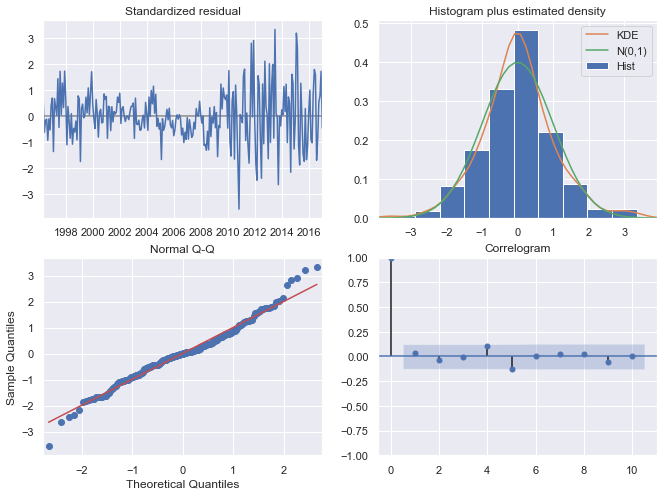

In [209]:
pdq = (2,1,0)
pdqs = (0,0,2,12)
train, test, results = model_fit_SARIMAX(df_ZC_best5[0]['mreturns'], pdq=pdq, pdqs=pdqs)

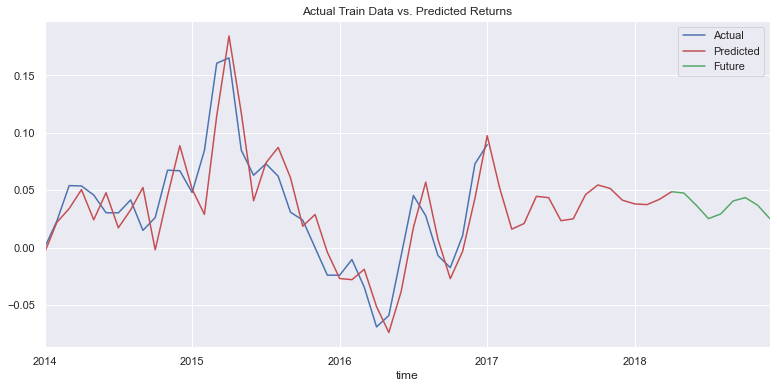

In [211]:
pred_start = datetime(2014,1,1)
pred_end = datetime(2018,4,1)
future_end = datetime(2018,12,1)

train_pred = results.predict(start = pred_start, end = pred_end, typ='levels')
future_pred = results.predict(start = pred_end, end = future_end, typ='levels')
#rmse = math.sqrt(mean_squared_error(train[pred_start:pred_end],train_pred))
#print(f'ARIMA model RMSE on train data: %.5f' % rmse)

plt.figure(figsize=(13,6))
train[pred_start:pred_end].plot(label='Actual',color='b')
train_pred.plot(label='Predicted',color='r')
future_pred.plot(label='Future', color='g')
plt.legend(loc='best')
plt.title('Actual Train Data vs. Predicted Returns')
plt.show()

In [197]:
train_end = datetime(2016,1,1)
test_end = datetime(2018,4,1)
future_end = datetime(2018,12,1)

train_data = df_ZC_best5[0]['mreturns'][:train_end]
test_data = df_ZC_best5[0]['mreturns'][train_end + timedelta(days=1):test_end]

predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data_pred = df_ZC_best5[0]['mreturns'][:end_date - timedelta(days=1)]
    model = SARIMAX(train_data_pred, order=(2,1,0),seasonal_order=(0,0,2,12))
    model_fit = model.fit(disp=0)
    pred = model_fit.predict(end_date, typ='levels')
    predictions_rolling.loc[end_date] = pred.loc[end_date]

future_pred = model_fit.predict(start = end_date, end = future_end, typ='levels')

In [198]:
rmse = math.sqrt(mean_squared_error(test_data, predictions_rolling))
print('SARIMA model RMSE on test data: %.5f' % rmse)

SARIMA model RMSE on test data: 0.02546


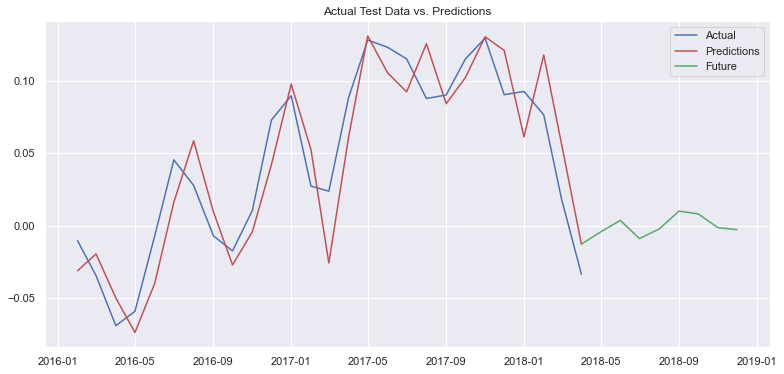

In [199]:
plt.figure(figsize=(13,6))
plt.title('Actual Test Data vs. Predictions')
plt.plot(test_data,label='Actual', color='b')
plt.plot(predictions_rolling,label='Predictions',color='r')
plt.plot(future_pred, label='Future', color='g')
plt.legend(loc='best')
plt.show()